I want to get my hands dirty with clustering after seeing a great lecture at Stanford. Here I'm looking at k-means clustering, an algorithm to identify groups in multidimensional data.


I'm using a builtin dataset in R, "ruspini"
Also, I found this site as a helpful template to start:
http://michael.hahsler.net/SMU/EMIS7332/R/chap8.html

In [85]:
#install.packages('fpc')
library(stats)
library(cluster)
library(fpc)
data(ruspini, package="cluster")

Installing package into ‘/Users/Peter/Library/R/3.2/library’
(as ‘lib’ is unspecified)


ERROR: Error in contrib.url(repos, type): trying to use CRAN without setting a mirror


ERROR: Error in library(fpc): there is no package called ‘fpc’


In [7]:
#Reshuffle and scale
ruspini <- ruspini[sample(1:nrow(ruspini)),]
ruspini <- scale(ruspini)
df=data.frame(ruspini)

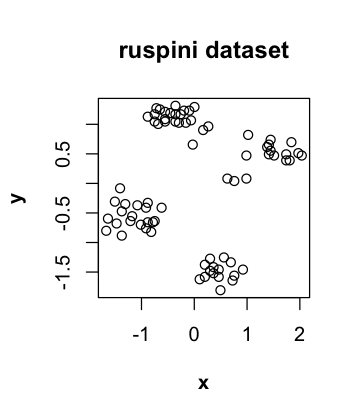

In [20]:
# Take a look at the dataset
options(repr.plot.height=3.5 , repr.plot.width=3)
#par(font.lab=1,cex.lab=1.8,cex.main=2,cex.axis=1.4,mar = c(5,7,4,2))
plot(df$x, df$y, xlab='x', ylab='y', font.lab=2)
title('ruspini dataset')


K-means needs to know the number of clusters beforehand. Let's loop through a total of nine clusters. Also, at each iteration, we will record a quality statistic, the within cluster sum of squares.

[1] "Within cluster sum of squares (w)"
[1] 148
[1] 74.447
[1] 39.50969
[1] 10.08781
[1] 7.791009
[1] 6.206943
[1] 4.700576
[1] 4.212406
[1] 3.548936


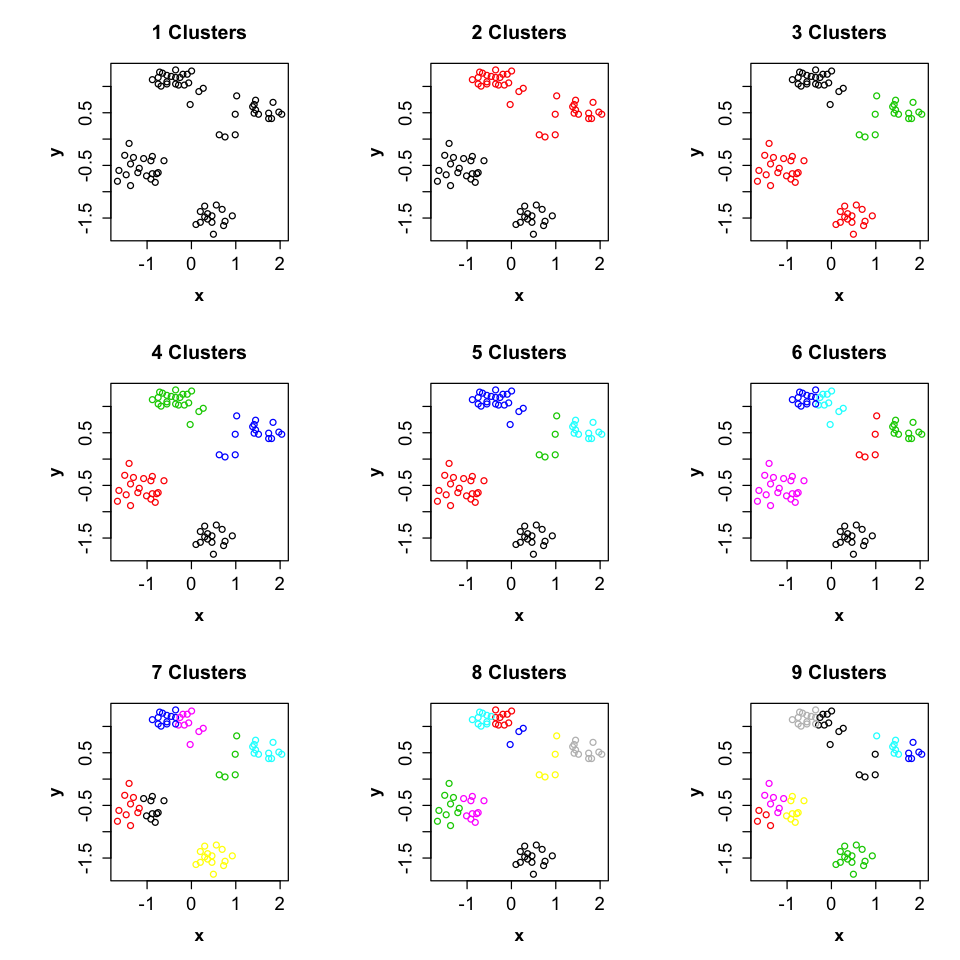

In [49]:
#Let's do k-means clustering first

options(repr.plot.height=8 , repr.plot.width=8)

print('Within cluster sum of squares (w)')
#par(mfrow=c(3,3))
par(mfrow=c(3,3),font.lab=2,cex.lab=1.3,cex.main=1.5,cex.axis=1.4,mar = c(5,7,4,2))
kmW=numeric()
for (i in 1:9)
{
    km <- kmeans(df[1:2], centers=i, nstart=10)
    plot(df$x,df$y,col=km$cluster,xlab='x',ylab='y')
    title(paste0(i,' Clusters'))
    print(km$tot.withinss)
    kmW = append(kmW,km$tot.withinss)
}
#?kmeans


The algorithm looks like its doing a good job. The within cluster sum of squares decreases as the number of clusters goes up. But that sum of squares will approach zero as we increase the cluster number toward the total number of samples. How can we determine the right number of clusters, especially when the data are not as clean as this example?

One thing I liked from the lecture I attended was using random data as a negative control. So, I want to see how well the algorithm does *relative to randomly distributed data*. To do this, I'll draw a box around the outermost points, then populate that box with randomly distributed data.

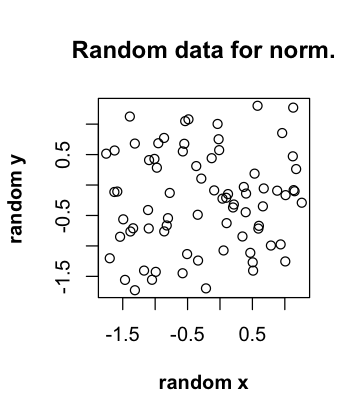

In [54]:
xRange = range(df[,1])
yRange = range(df[,2])

df$simX=runif(nrow(df),min=yRange[1],max=yRange[2])
df$simY=runif(nrow(df),min=yRange[1],max=yRange[2])

options(repr.plot.height=3.5 , repr.plot.width=3)

plot(df$simX,df$simY,font.lab=2,xlab='random x',ylab='random y')
title('Random data for norm.')
#plot(simX,simY,data=df)

Okay, now let's run the clustering analysis on the random data, and compute the within cluster sum of squares...

[1] 124.1528
[1] 71.68231
[1] 42.35621
[1] 30.07105
[1] 23.57531
[1] 17.67242
[1] 14.49545
[1] 11.9946
[1] 10.26424


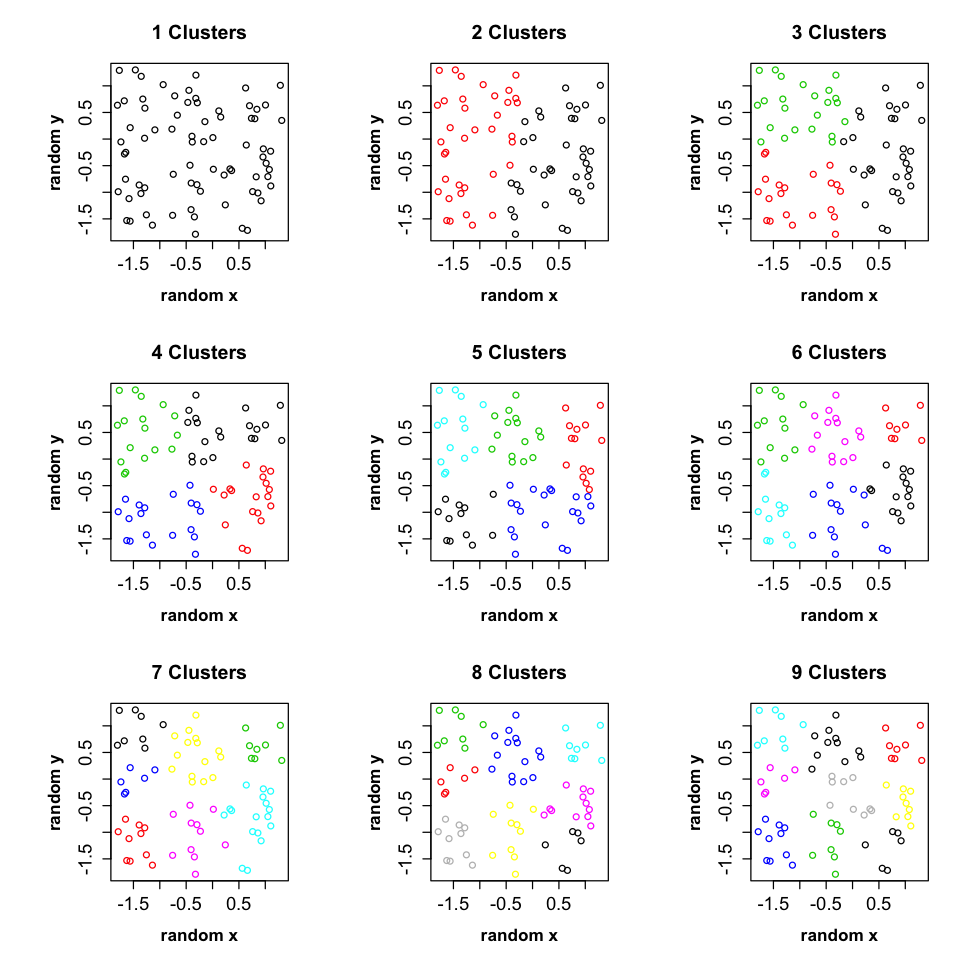

In [38]:
options(repr.plot.height=8 , repr.plot.width=8)


par(mfrow=c(3,3))
kmCtrl=numeric()
par(mfrow=c(3,3),font.lab=2,cex.lab=1.3,cex.main=1.5,cex.axis=1.4,mar = c(5,7,4,2))
for (i in 1:9)
{
    km <- kmeans(df[,3:4], centers=i, nstart=10)
    plot(df$simX,df$simY,col=km$cluster,xlab='random x',ylab='random y')
    title(paste0(i,' Clusters'))
    print(km$tot.withinss)
    kmCtrl = append(kmCtrl,km$tot.withinss)
}



Notice that the sum of squares term monotonically decreases for random data too. Now, let's normalize the SoS of our data by subtracting the SoS of the random data

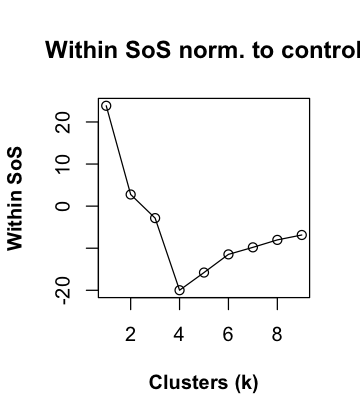

In [48]:
diffW = kmW-kmCtrl
#print(kmW)
#print(kmCtrl)

options(repr.plot.height=3.5 , repr.plot.width=3)
plot(diffW,type='o',font.lab=2, ylab='Within SoS',xlab='Clusters (k)')
title('Within SoS norm. to control')


In [82]:
cluster.stats

ERROR: Error in eval(expr, envir, enclos): object 'cluster.stats' not found


At this point it is clear that the sum of squares is minized when four clusters are used. In this dataset, it is fairly easy to see, but I think this approach (normalizing to matched random data) should help in cases when the data are not separated so clearly.


Now, let's quickly look at hierarchichal clustering. In this algorithm, points are sequentially clustered according to the euclidean distance between them. We will do a clustering comparison between the x-y data from the ruspini dataset, relative to the randomly generated data.

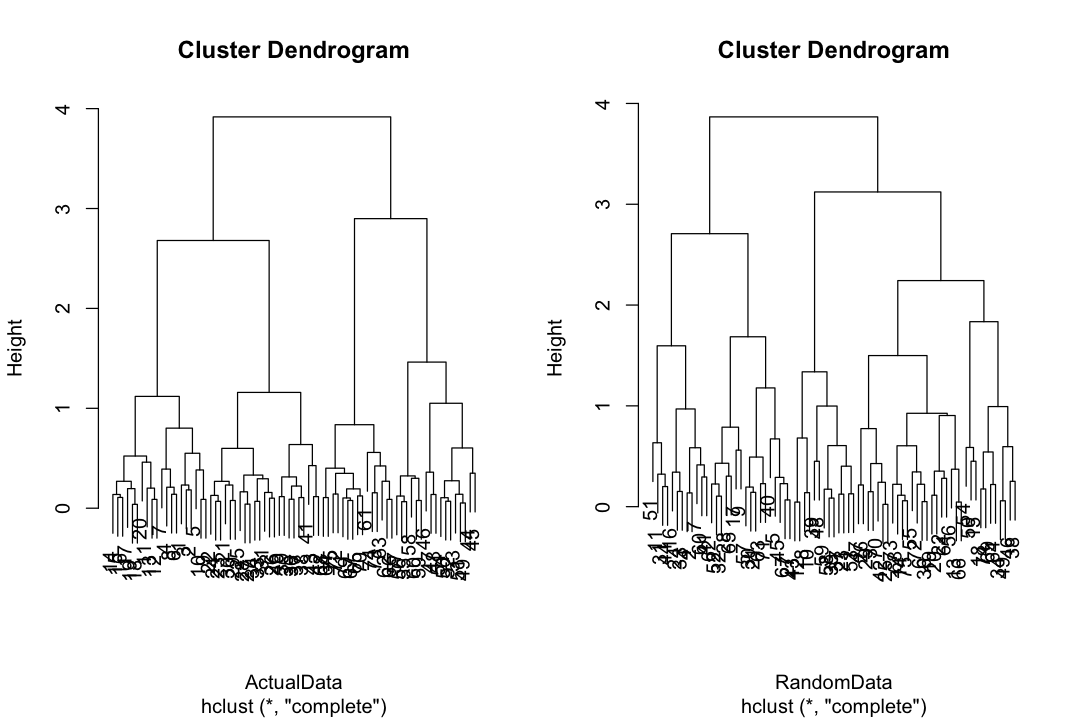

In [79]:
options(repr.plot.height=6 , repr.plot.width=9)

ActualData  <- dist(df[,1:2])
hc <- hclust(ActualData, method="complete")
par(mfrow=c(1,2))
plot(hc)

RandomData <- dist(df[,3:4])
hc2 <- hclust(RandomData, method="complete")
plot(hc2)

Looks like there's a couple things to note. First, the bottom branches are all roughly the same height, as opposed to the random, which is more jagged. This is because the initial points in the acual dataset started closer, as seen on the original graph.

Secondly, it looks like 4 clusters occurs at a height of ~1.5 in the actual data, whereas in the random data, it occurs at ~2.3. So 4 cluster, as above, seems reasonable. This seems like like its more error prone relative to the optimal normalized minimum, shown above